In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [16]:
df = pd.read_csv("Input/train.csv")

| Variable  | Definition                             | Key                                        |
|-----------|----------------------------------------|--------------------------------------------|
| survival  | Survival                               | 0 = No, 1 = Yes                            |
| pclass    | Ticket class                           | 1 = 1st, 2 = 2nd, 3 = 3rd                  |
| sex       | Sex                                    |                                            |
| Age       | Age in years                           |                                            |
| sibsp     | # of siblings / spouses aboard the Titanic |                                        |
| parch     | # of parents / children aboard the Titanic |                                        |
| ticket    | Ticket number                          |                                            |
| fare      | Passenger fare                         |                                            |
| cabin     | Cabin number                           |                                            |
| embarked  | Port of Embarkation                    | C = Cherbourg, Q = Queenstown, S = Southampton |


In [17]:
df.shape

(891, 12)

In [18]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [21]:
df["Sex_category"] = df.Sex.map(dict(male=0, female=1))


In [22]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_category
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [23]:
df.groupby("Sex").Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [24]:
df.drop(["Cabin", "Embarked"], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Sex_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,0


In [25]:
df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
Sex_category      0
dtype: int64

In [26]:
df.loc[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_category


In [27]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Text(0.5, 0, 'Fare')

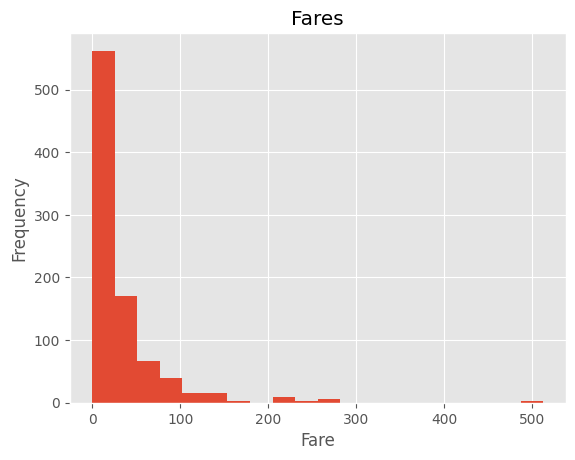

In [28]:
ax = df['Fare'].plot(kind='hist',
                          bins=20,
                          title='Fares')
ax.set_xlabel('Fare')

In [29]:
df[df.Fare > 200].sort_values("Fare", ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_category
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,0
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,0
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,0
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,1
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,0
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,1
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,0


Text(0.5, 0, 'Age')

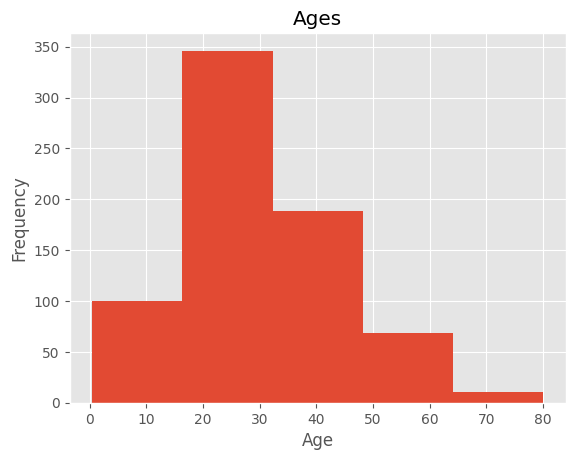

In [30]:
ax = df['Age'].plot(kind='hist',
                          bins=5,
                          title='Ages')
ax.set_xlabel('Age')

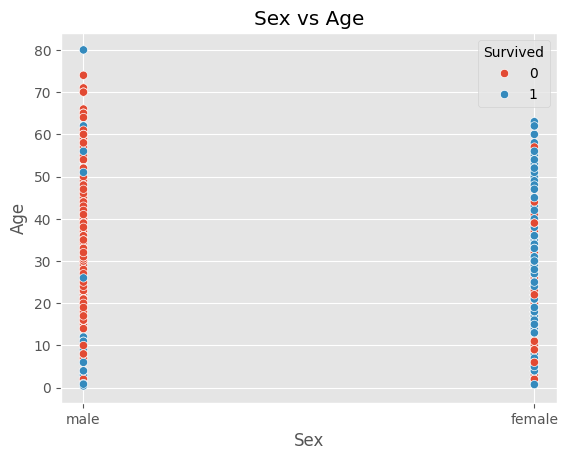

In [31]:
ax = sns.scatterplot(x='Sex',
                y='Age',
                hue='Survived',
                data=df)
ax.set_title('Sex vs Age')
plt.show()

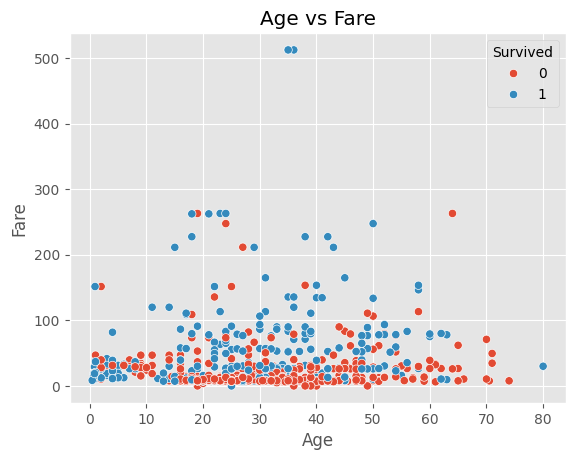

In [32]:
ax = sns.scatterplot(x='Age',
                y='Fare',
                hue='Survived',
                data=df)
ax.set_title('Age vs Fare')
plt.show()

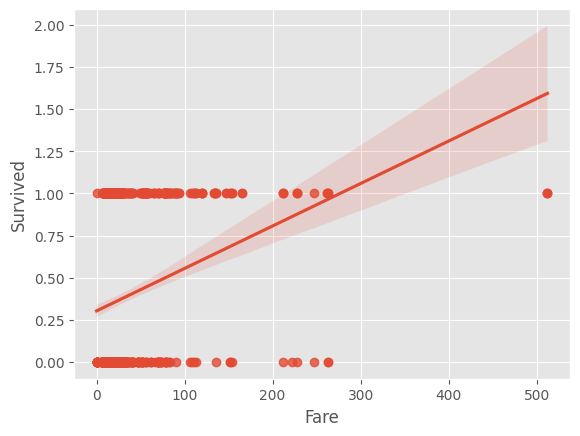

In [33]:
sns.regplot(x="Fare", y="Survived", data=df)
plt.show()

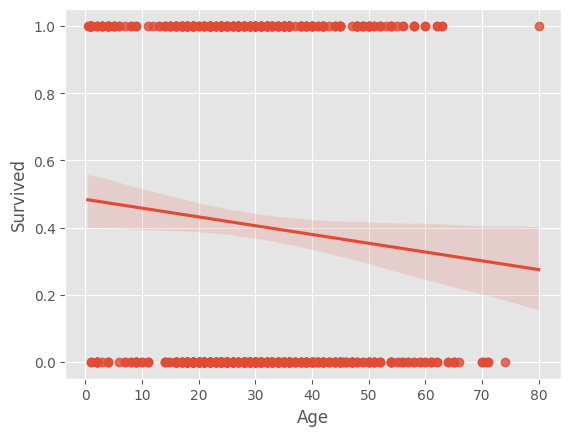

In [34]:
sns.regplot(x="Age", y="Survived", data=df)
plt.show()

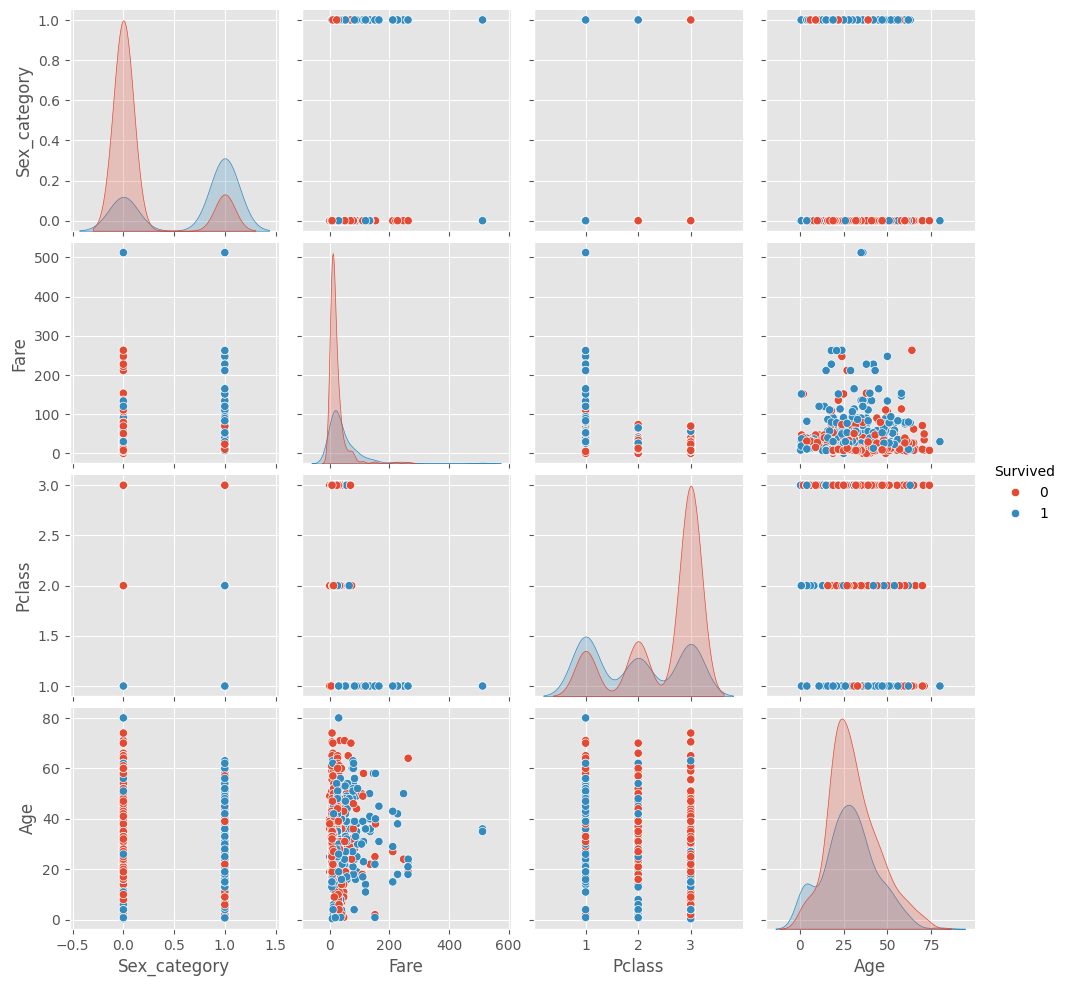

In [35]:
sns.pairplot(df,
             vars=['Sex_category','Fare',
                   'Pclass','Age'],
            hue='Survived')
plt.show()

In [36]:
df_corr = df[['Sex_category','Fare',
                   'Pclass','Age']].dropna().corr()
df_corr

,Sex_category,Fare,Pclass,Age
Sex_category,1.000000,0.184994,-0.155460,-0.093254
Fare,0.184994,1.000000,-0.554182,0.096067
Pclass,-0.155460,-0.554182,1.000000,-0.369226
Age,-0.093254,0.096067,-0.369226,1.000000


<Axes: >

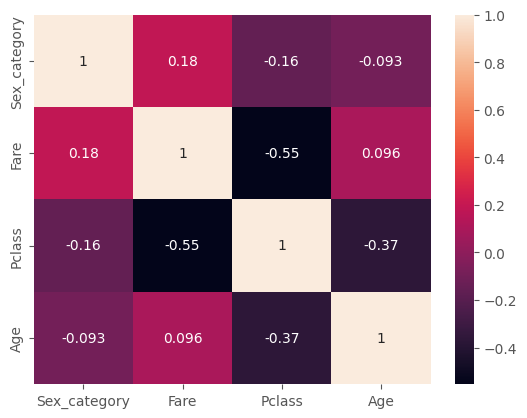

In [37]:
sns.heatmap(df_corr, annot=True)